In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

In [10]:
#Importing the data
(X_train, y_train),(X_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test
#Normalizing the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [11]:
#Initializing the classifier Network
classifier = Sequential()

#Adding the input LSTM network layer
classifier.add(CuDNNLSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
classifier.add(Dropout(0.2))

#Adding a second LSTM network layer
classifier.add(CuDNNLSTM(128))

#Adding a dense hidden layer
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.2))

#Adding the output layer
classifier.add(Dense(10, activation='softmax'))



In [18]:
#Compiling the network
classifier.compile( loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001, decay=1e-6),
              metrics=['accuracy'] )

#Fitting the data to the model
model_history = classifier.fit(X_train,
         y_train,
          epochs=20,
          validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 17s 7ms/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 0.0460 - val_accuracy: 0.9898
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.0412 - val_accuracy: 0.9914
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0446 - val_accuracy: 0.9899
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0112 - accuracy: 0.9970 - val_loss: 0.0423 - val_accuracy: 0.9911
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.0410 - val_accuracy: 0.9914
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.0363 - val_accuracy: 0.9911
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.0395 - val_ac

In [13]:
test_loss, test_acc = classifier.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0445 - accuracy: 0.9898
Test Loss: 0.044509727507829666
Test Accuracy: 0.989799976348877


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


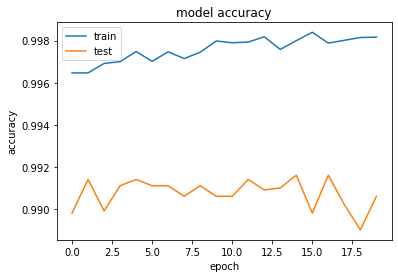

In [19]:
import matplotlib.pyplot as plt

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

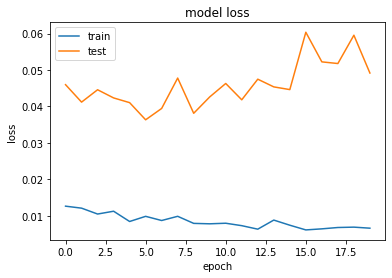

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()